# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

Gerando gráficos de barras para a distribuição das variáveis qualitativas ao longo do tempo...



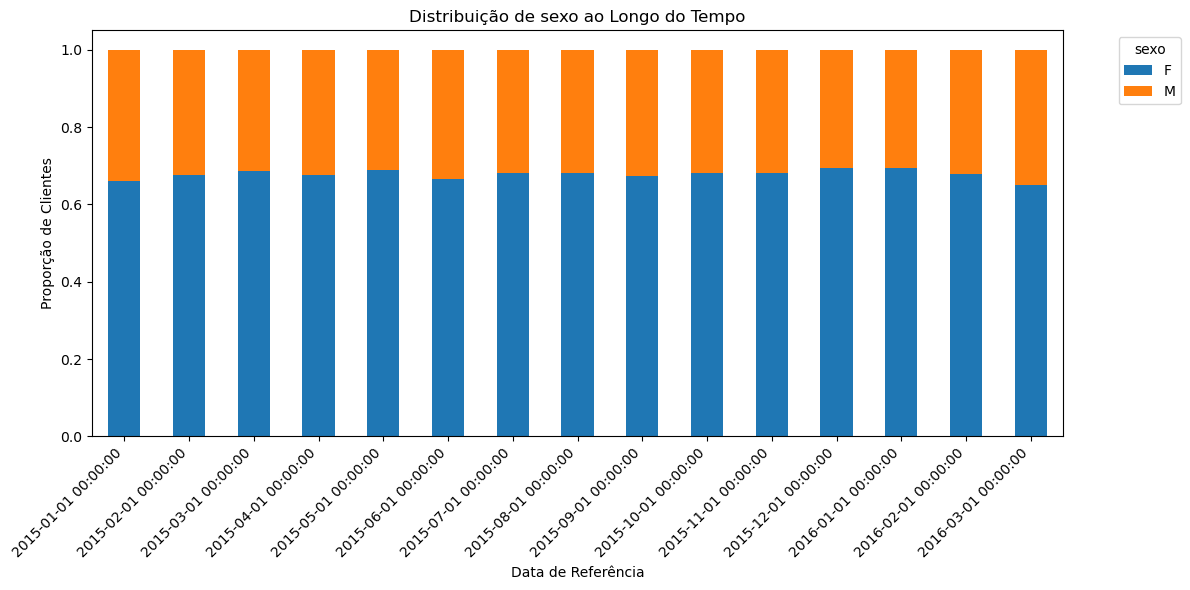

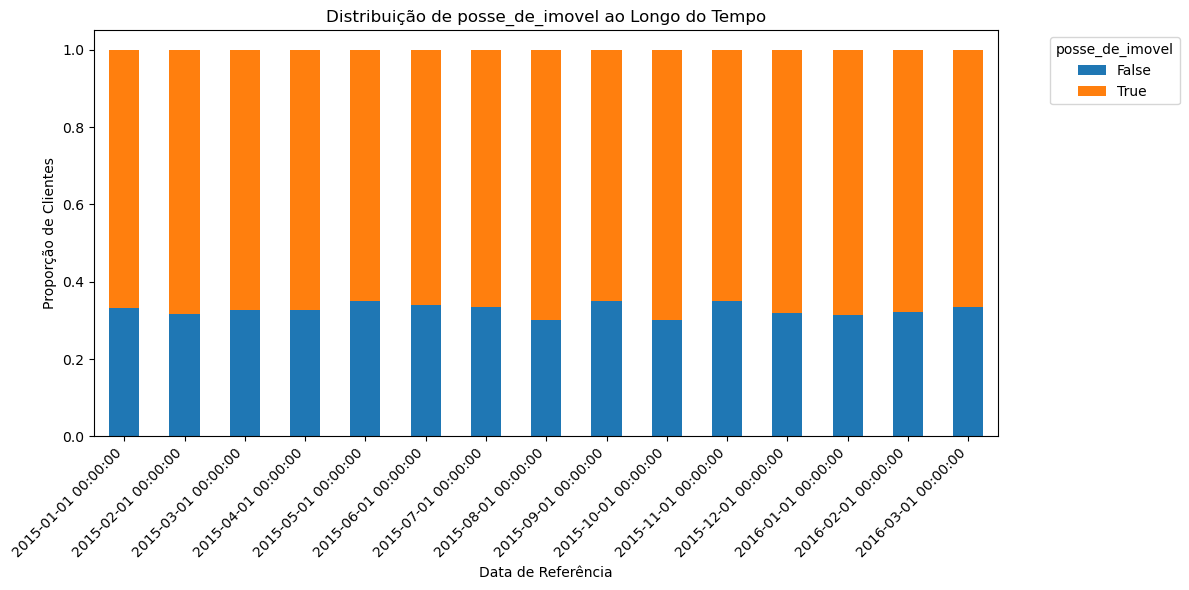

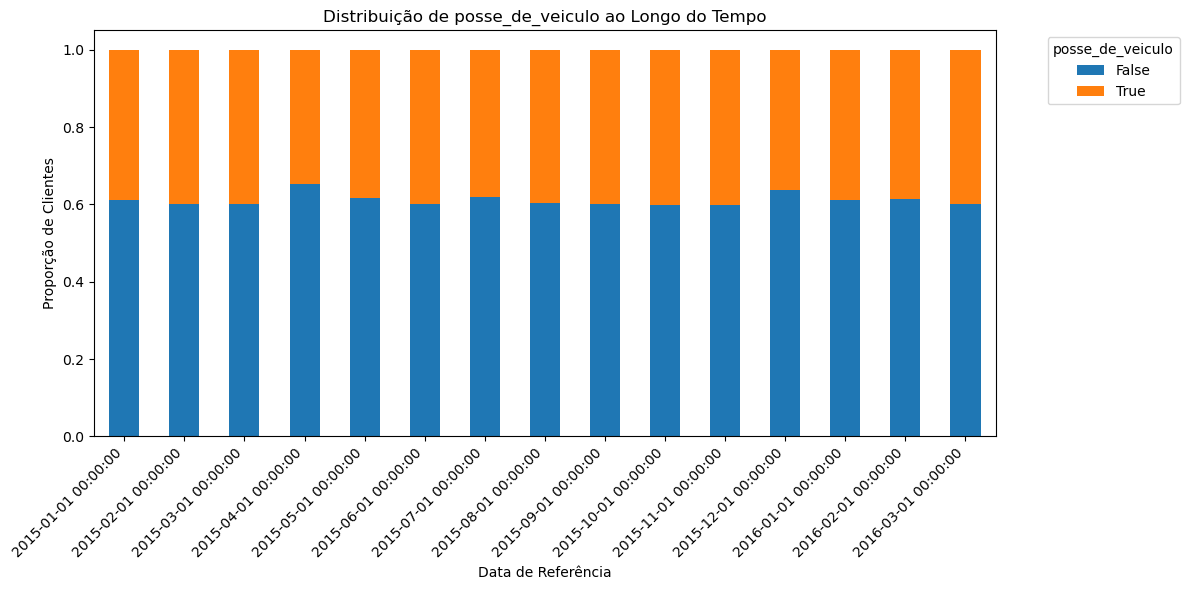

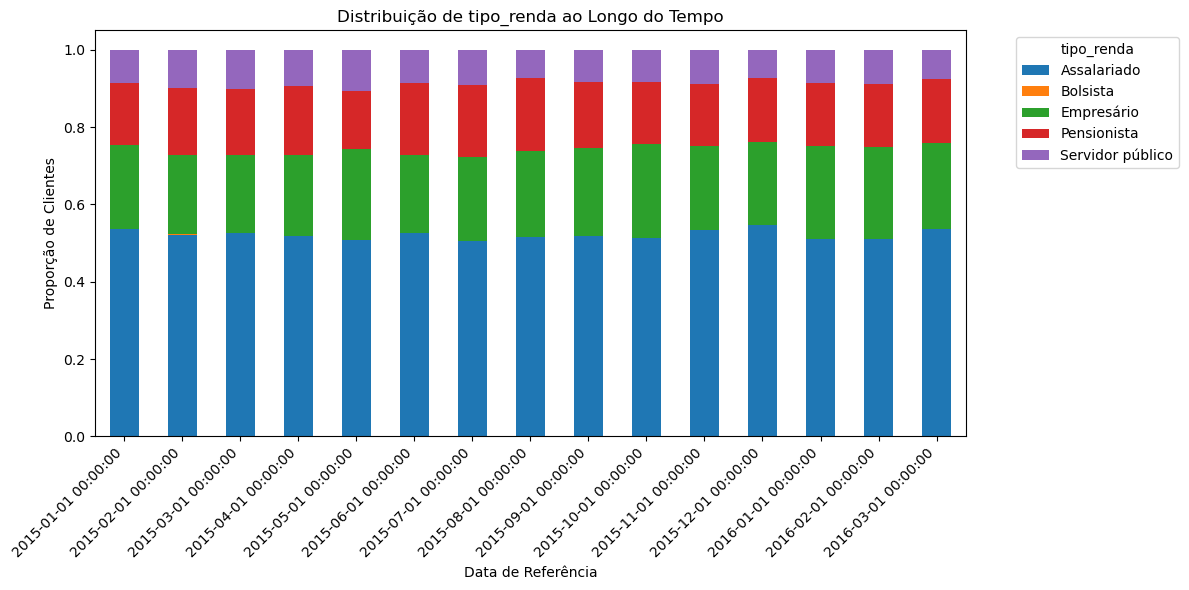

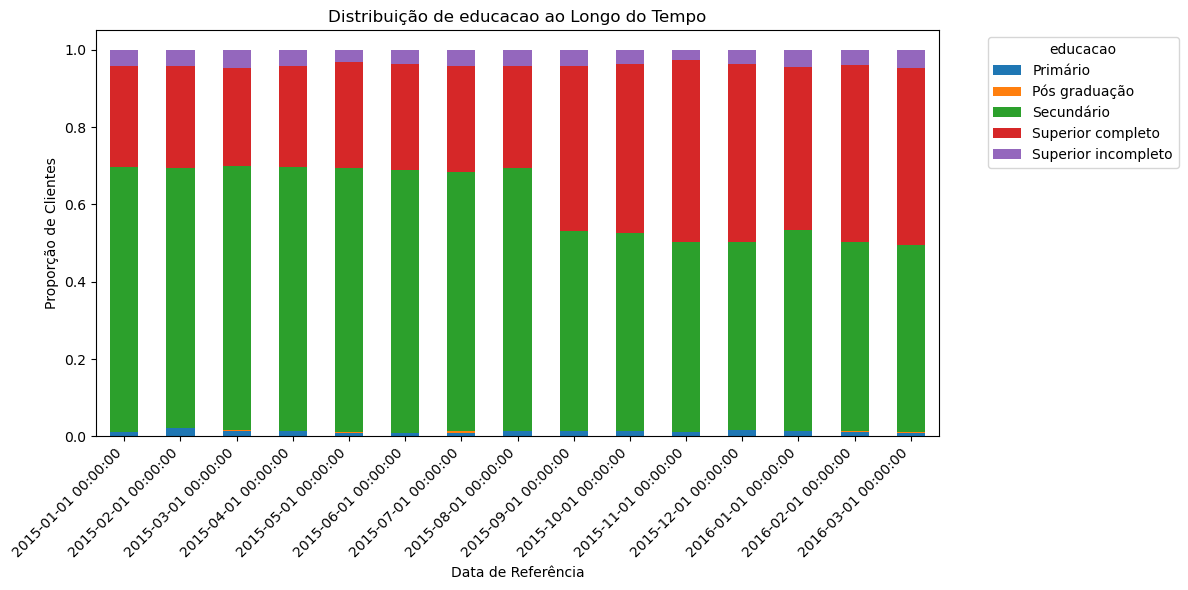

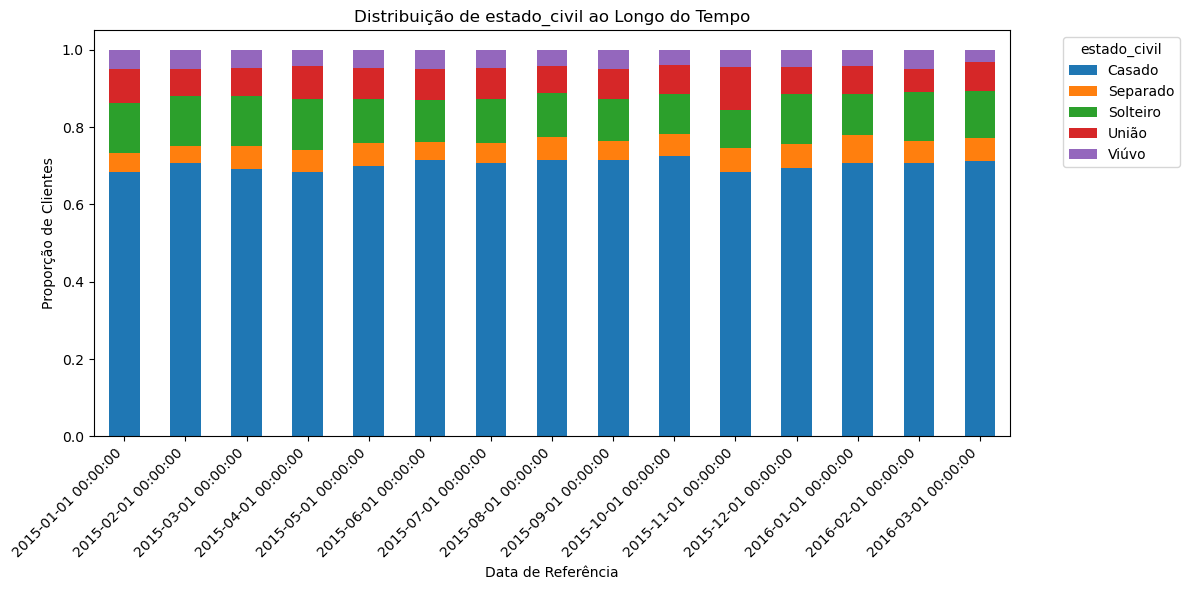

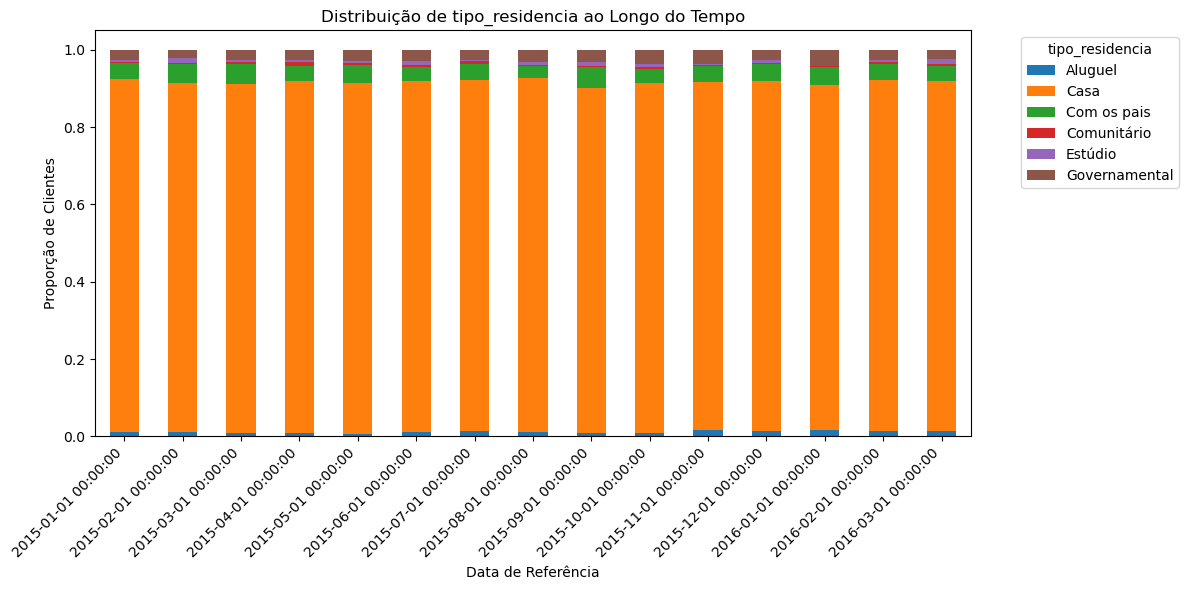


Todos os gráficos foram gerados. Observe as tendências e estabilidade das proporções de cada categoria ao longo dos meses.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('previsao_de_renda.csv')

# Pré-processamento: Remover colunas de índice
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
if 'index' in df.columns:
    df = df.drop(columns=['index'])

# Converter 'data_ref' para formato datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Identificar as colunas qualitativas para análise
qualitative_cols = [
    'sexo',
    'posse_de_imovel',
    'posse_de_veiculo',
    'tipo_renda',
    'educacao',
    'estado_civil',
    'tipo_residencia'
]

print("Gerando gráficos de barras para a distribuição das variáveis qualitativas ao longo do tempo...\n")

# Loop para criar um gráfico para cada variável qualitativa
for col in qualitative_cols:
    plt.figure(figsize=(12, 6))

    # Calcular a proporção de cada categoria por data_ref
    # Isso criará uma tabela onde o índice é 'data_ref' e as colunas são as categorias da variável 'col',
    # e os valores são as proporções (somam 1 para cada data_ref).
    df_proportions = df.groupby('data_ref')[col].value_counts(normalize=True).unstack(fill_value=0)

    # Plotar o gráfico de barras empilhadas
    df_proportions.plot(kind='bar', stacked=True, figsize=(12, 6), ax=plt.gca())

    plt.title(f'Distribuição de {col} ao Longo do Tempo')
    plt.xlabel('Data de Referência')
    plt.ylabel('Proporção de Clientes')
    plt.xticks(rotation=45, ha='right') # Rotaciona os labels do eixo X para melhor legibilidade
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left') # Move a legenda para fora do gráfico
    plt.tight_layout() # Ajusta o layout para evitar sobreposição
    plt.show()

print("\nTodos os gráficos foram gerados. Observe as tendências e estabilidade das proporções de cada categoria ao longo dos meses.")

In [3]:
# ao longo do tempo as distribuições parecem estar semelhantes, apenas na educação pode se notar uma diferença siguinificativa, onde uma proporção maior de pessoas começaram a ter o nivel superior completo e  ma proporção menor de pessoas teve o secundario.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

Gerando gráficos da média da Renda (Log) por categoria e ao longo do tempo...



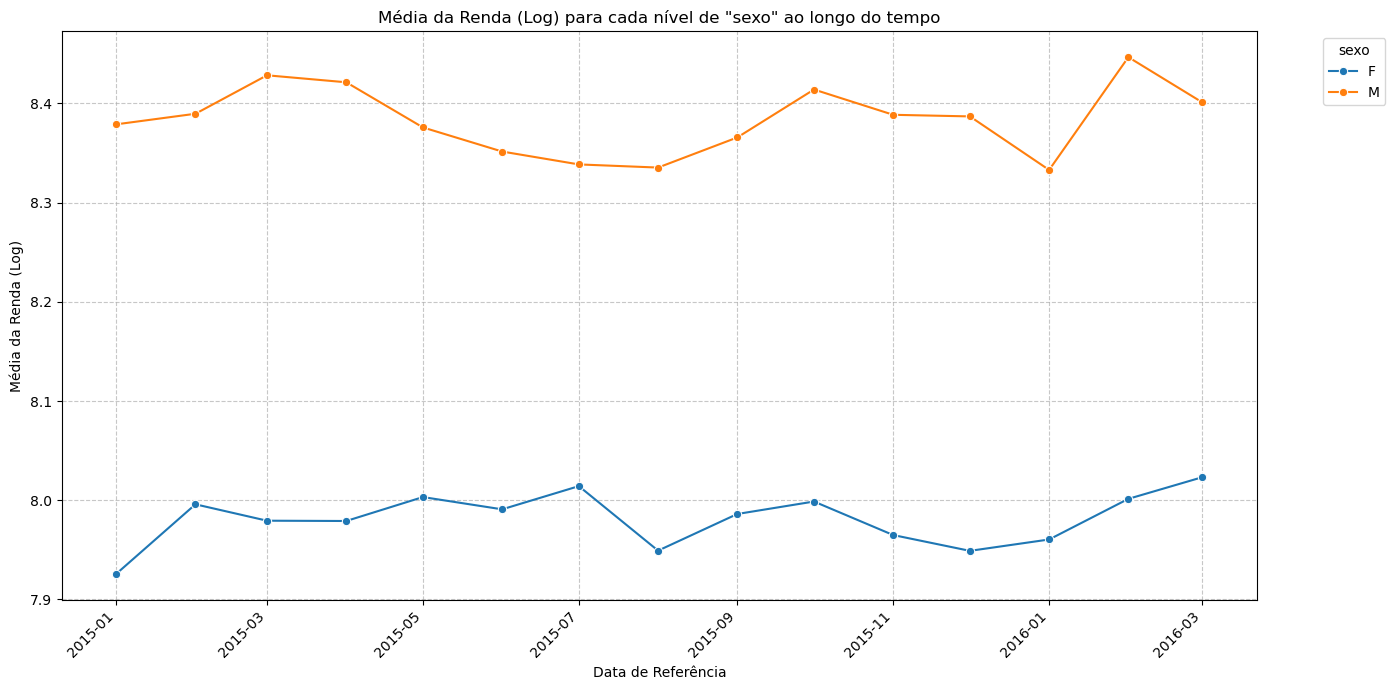

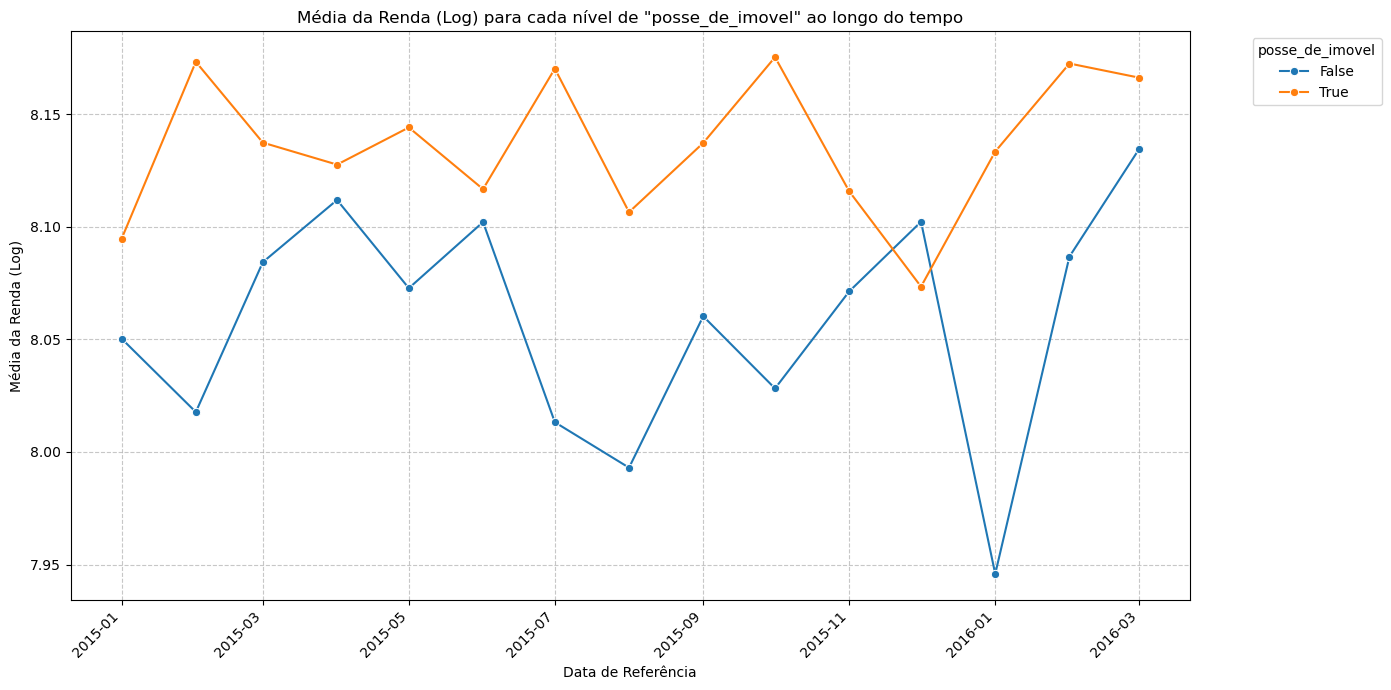

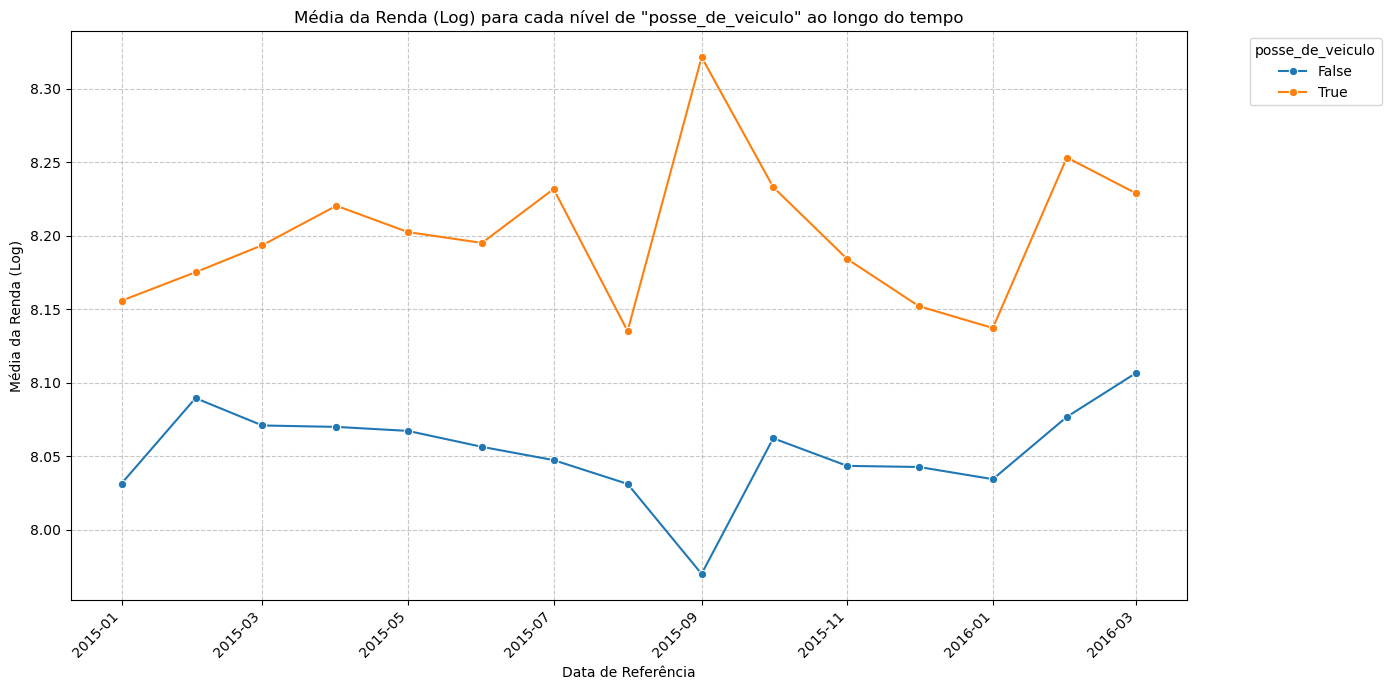

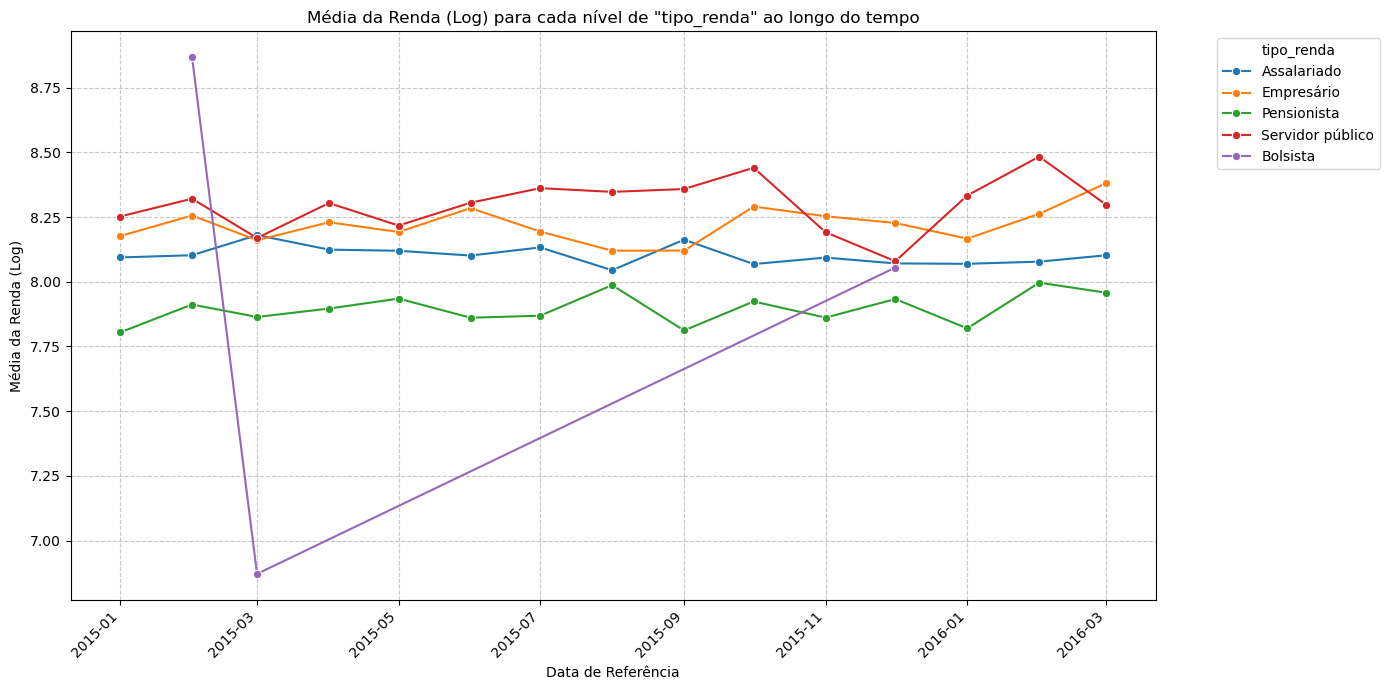

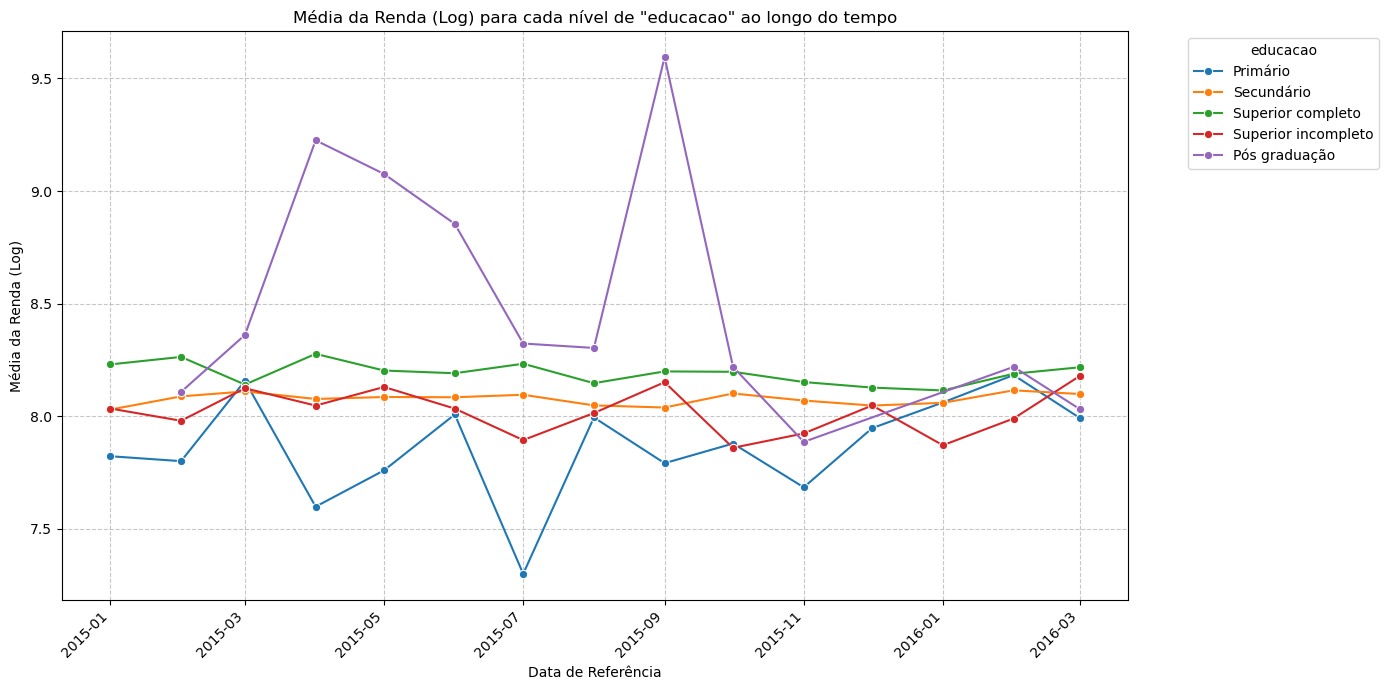

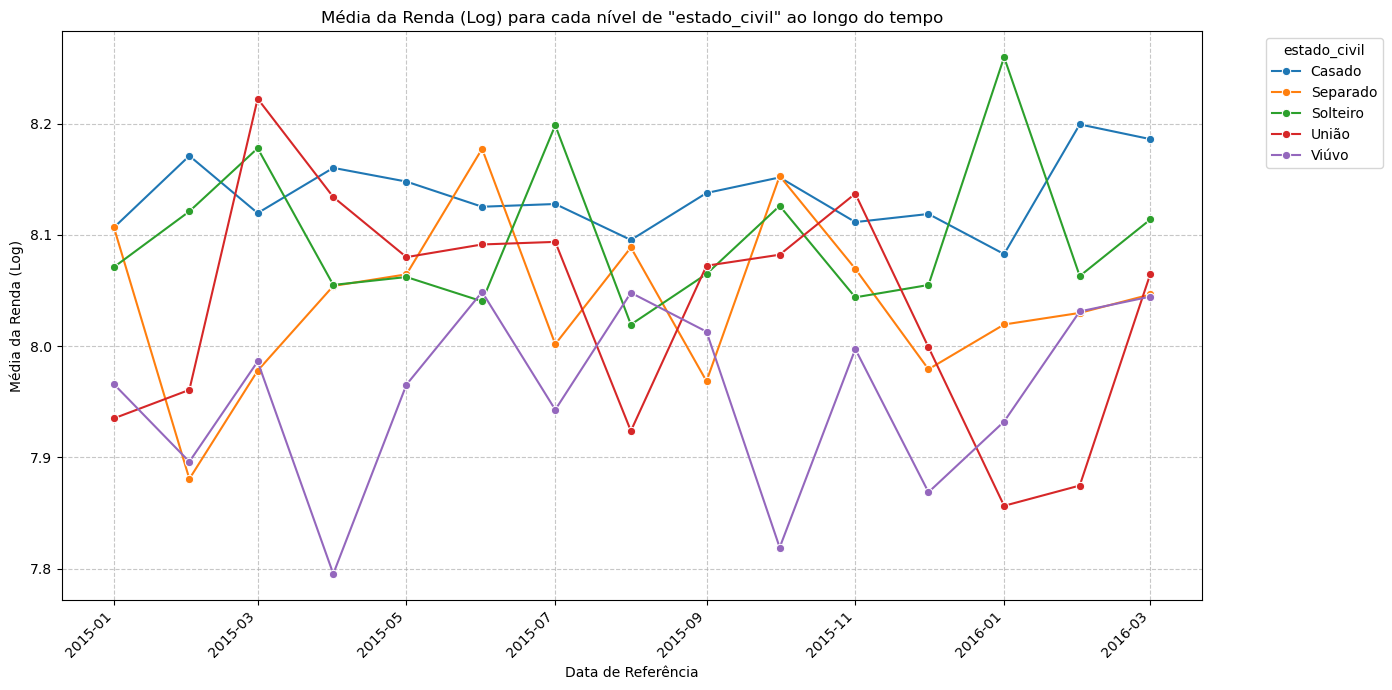

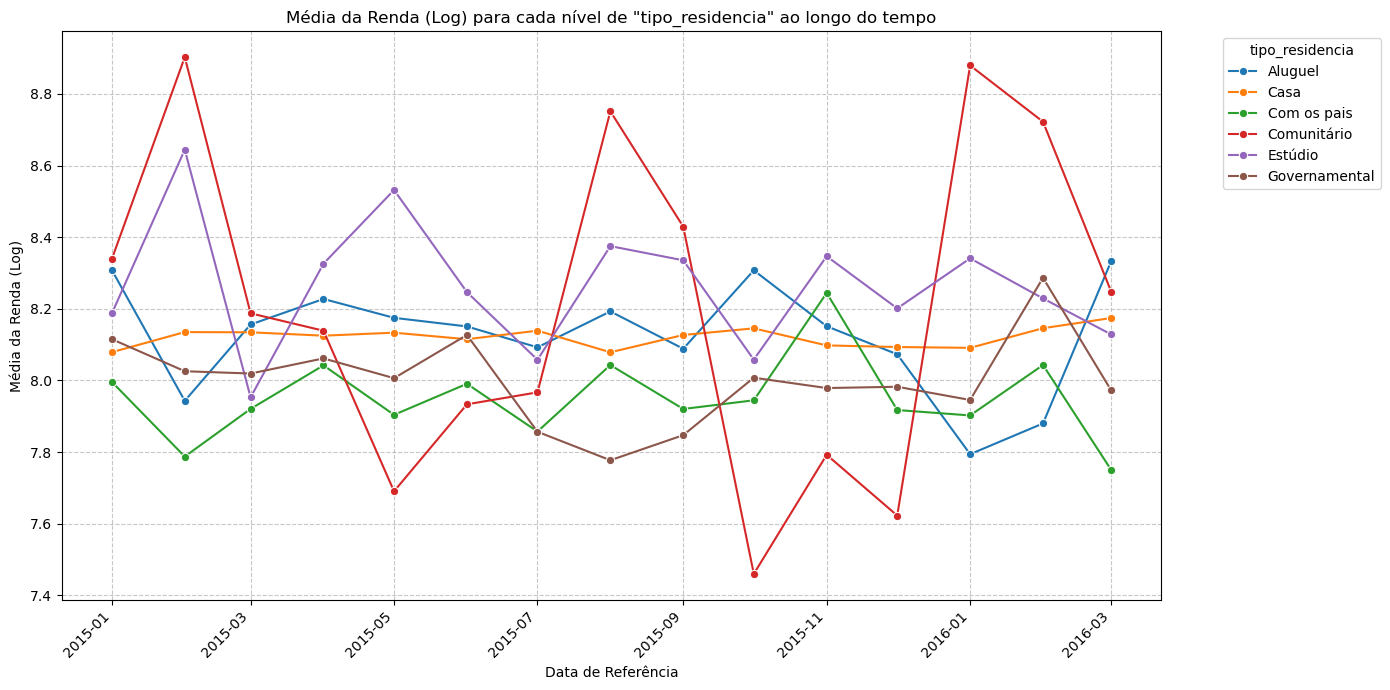

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carregar o dataset e pré-processar (garantindo que o df_analise esteja atualizado)
df = pd.read_csv('previsao_de_renda.csv')

if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
if 'index' in df.columns:
    df = df.drop(columns=['index'])

# Remover NaNs da renda e criar renda_log
df_analise = df.dropna(subset=['renda']).copy()
df_analise['data_ref'] = pd.to_datetime(df_analise['data_ref'])

min_renda = df_analise['renda'].min()
if min_renda <= 0:
    df_analise['renda_log'] = np.log1p(df_analise['renda'])
else:
    df_analise['renda_log'] = np.log(df_analise['renda'])

# Lista das variáveis qualitativas
qualitative_cols = [
    'sexo',
    'posse_de_imovel',
    'posse_de_veiculo',
    'tipo_renda',
    'educacao',
    'estado_civil',
    'tipo_residencia'
]

print("Gerando gráficos da média da Renda (Log) por categoria e ao longo do tempo...\n")

# Loop para cada variável qualitativa
for col in qualitative_cols:
    plt.figure(figsize=(14, 7))

    # Calcular a média da renda_log para cada categoria por data_ref
    # Isso criará um DataFrame com colunas 'data_ref', 'nome_da_variavel_qualitativa', 'renda_log' (média)
    df_mean_over_time = df_analise.groupby(['data_ref', col])['renda_log'].mean().reset_index()

    # Usar seaborn.lineplot para mostrar as tendências da média de renda para cada categoria
    sns.lineplot(x='data_ref', y='renda_log', hue=col, data=df_mean_over_time, marker='o')

    plt.title(f'Média da Renda (Log) para cada nível de "{col}" ao longo do tempo')
    plt.xlabel('Data de Referência')
    plt.ylabel('Média da Renda (Log)')
    plt.xticks(rotation=45, ha='right') # Rotação para melhor leitura das datas
    plt.grid(True, linestyle='--', alpha=0.7) # Adiciona grade para facilitar a leitura
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left') # Move legenda para não sobrepor o gráfico
    plt.tight_layout() # Ajusta o layout
    plt.show()

In [12]:
# Sim, na minha opinião é totalmente possível e recomendável utilizar essas variáveis em uma modelagem preditiva para a renda.

# Na verdade, o objetivo de todas as análises feitas (correlação, outliers, distribuição no tempo, e significância estatística) é justamente entender a relação das variáveis com a renda para selecioná-las e prepará-las para um modelo.

# O ideal seria continuar usando LOG de renda como variavel alvo, por ser a distribuição mais simetrica, além de ajustar as variaveis qualitativas para um padrão que possa ser quantificada, usando padrão numerico para que possamos tranformalas em variaveis quantitativas, e por fim fazer um tratamento dos dados para retirar os valores ausentes (NaN) que podem estar presentes em algumas das variaveis